In [44]:
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Load the data into MySQL

# Defining the column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Reading the csv file
iris_df = pd.read_csv("iris.data", header=None, names=column_names, delimiter=',')

# Connect to the MySQL database
cnx = mysql.connector.connect(user='root', password = 'password', host='localhost', database = 'zoe')
cursor = cnx.cursor()

# Insert each row into the MySQL table
for row in iris_df.itertuples():
    cursor.execute('INSERT INTO iris (sepal_length, sepal_width, petal_length, petal_width, species) VALUES (%s, %s, %s, %s, %s)', (row[1], row[2], row[3], row[4], row[5]))

# Commit the changes
cnx.commit()

# Close the cursor and database connection
# cursor.close()
# cnx.close()


### EDA using SQL

In [46]:
# Retrieving all the rows and columns from the iris dataset
cursor.execute('SELECT * FROM iris')
result_set = cursor.fetchall() # fetch all rows from the result set
print(result_set)

[(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'), (4.9, 3.0, 1.4, 0.2, 'Iris-setosa'), (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'), (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'), (5.0, 3.6, 1.4, 0.2, 'Iris-setosa'), (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'), (4.6, 3.4, 1.4, 0.3, 'Iris-setosa'), (5.0, 3.4, 1.5, 0.2, 'Iris-setosa'), (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'), (4.9, 3.1, 1.5, 0.1, 'Iris-setosa'), (5.4, 3.7, 1.5, 0.2, 'Iris-setosa'), (4.8, 3.4, 1.6, 0.2, 'Iris-setosa'), (4.8, 3.0, 1.4, 0.1, 'Iris-setosa'), (4.3, 3.0, 1.1, 0.1, 'Iris-setosa'), (5.8, 4.0, 1.2, 0.2, 'Iris-setosa'), (5.7, 4.4, 1.5, 0.4, 'Iris-setosa'), (5.4, 3.9, 1.3, 0.4, 'Iris-setosa'), (5.1, 3.5, 1.4, 0.3, 'Iris-setosa'), (5.7, 3.8, 1.7, 0.3, 'Iris-setosa'), (5.1, 3.8, 1.5, 0.3, 'Iris-setosa'), (5.4, 3.4, 1.7, 0.2, 'Iris-setosa'), (5.1, 3.7, 1.5, 0.4, 'Iris-setosa'), (4.6, 3.6, 1.0, 0.2, 'Iris-setosa'), (5.1, 3.3, 1.7, 0.5, 'Iris-setosa'), (4.8, 3.4, 1.9, 0.2, 'Iris-setosa'), (5.0, 3.0, 1.6, 0.2, 'Iris-setosa'), (5.0, 3.4, 1.6, 0.4, 'Iris-setosa'), 

### EDA Using Python

In [47]:
# Check the first few rows of the dataset
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [48]:
# Check the data types and missing values of the columns
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [107]:
# Checking the distribution of the features
print(np.sort(iris_df.sepal_length.unique()))
print(np.sort(iris_df.sepal_width.unique()))
print(np.sort(iris_df.petal_length.unique()))
print(np.sort(iris_df.petal_width.unique()))

[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]
[2.  2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.4]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]
[0.1 0.2 0.3 0.4 0.5 0.6 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5]


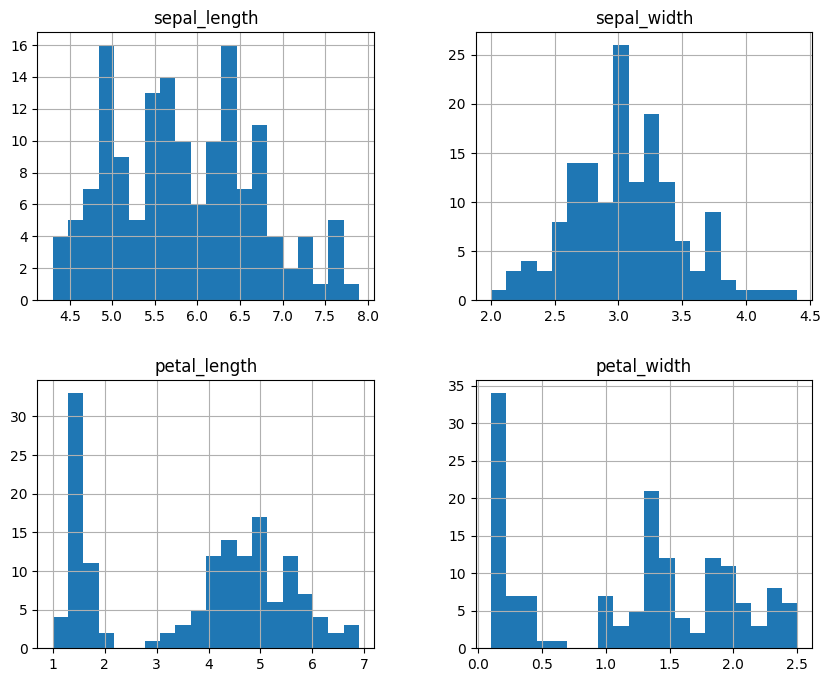

In [50]:
# Visualize the distribution of the features
iris_df.hist(bins=20, figsize=(10,8))
plt.show()

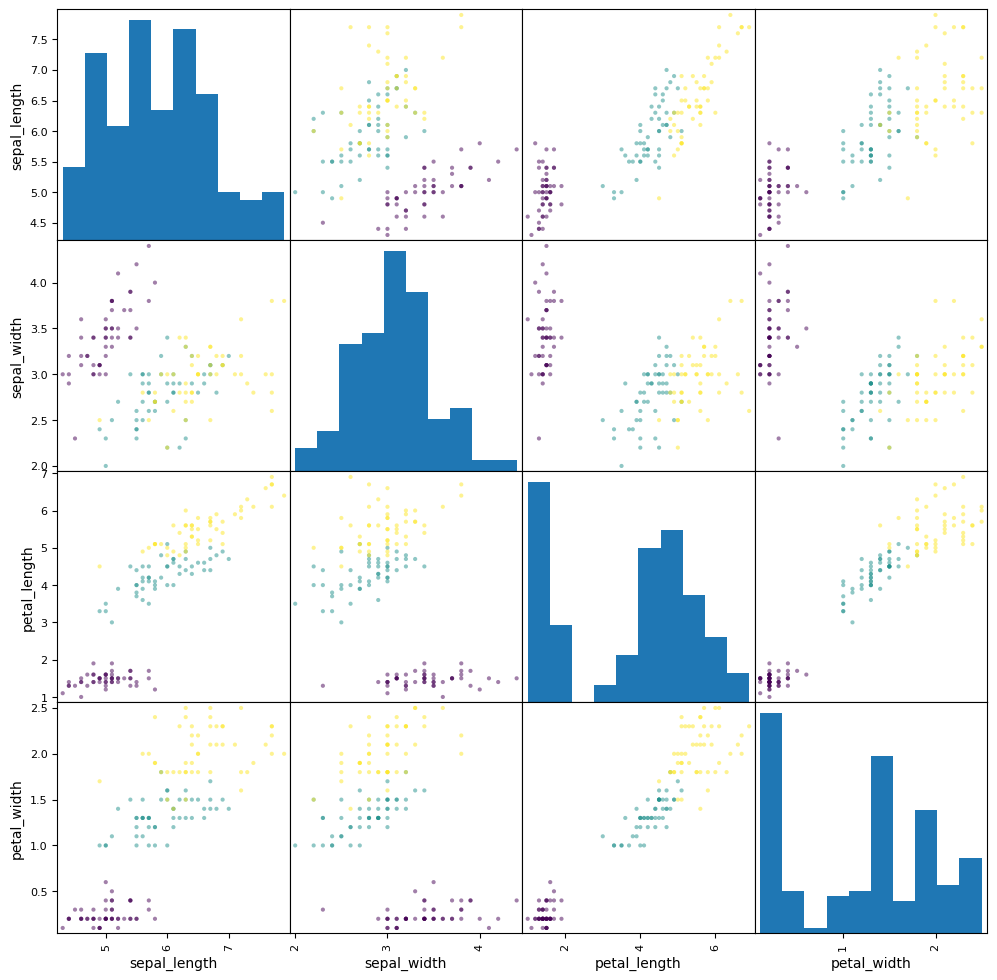

In [51]:
# Visualize the relationships between the features
pd.plotting.scatter_matrix(iris_df, c=iris_df['species'].astype('category').cat.codes, figsize=(12,12))
plt.show()

### Data Preprocessing

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [100]:
# Split the dataset into features and target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [60]:
# Normalize/scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Encode the target variable
y_encoded = pd.get_dummies(y)

# Convert y_encoded to a 1D array
y = np.argmax(y_encoded.values, axis=1)

In [62]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Dimensionality reduction

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use ANOVA F-value to select the top 3 features
selector = SelectKBest(score_func=f_classif, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)

# Print the F-value scores for each feature
print(selector.scores_)

# Print the selected feature indices
print(selector.get_support(indices=True))

[ 84.80836804  39.41570472 924.34130395 680.44346125]
[0 2 3]


### Model training

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosted Decision Tree classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [95]:
# score = clf.score(X_train, y_train)
# print(score)

### Model Evaluation

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test
y_pred = clf.predict(X_test)

In [111]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion_Matrix: {:.2f}".format(conf_matrix))
print("Confusion Matrix:")
print(conf_matrix)

# Generate Classification Report
report = classification_report(y_test, y_pred)
print(report)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

